In [1]:
# this notebook allows the construction of Fig.7 through the analysis of the correlation between experimental
# Lewis acidity scales

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [76]:
# load the data
df = pd.read_csv('data/experimental_lewis_acid_scales.csv', index_col=0)

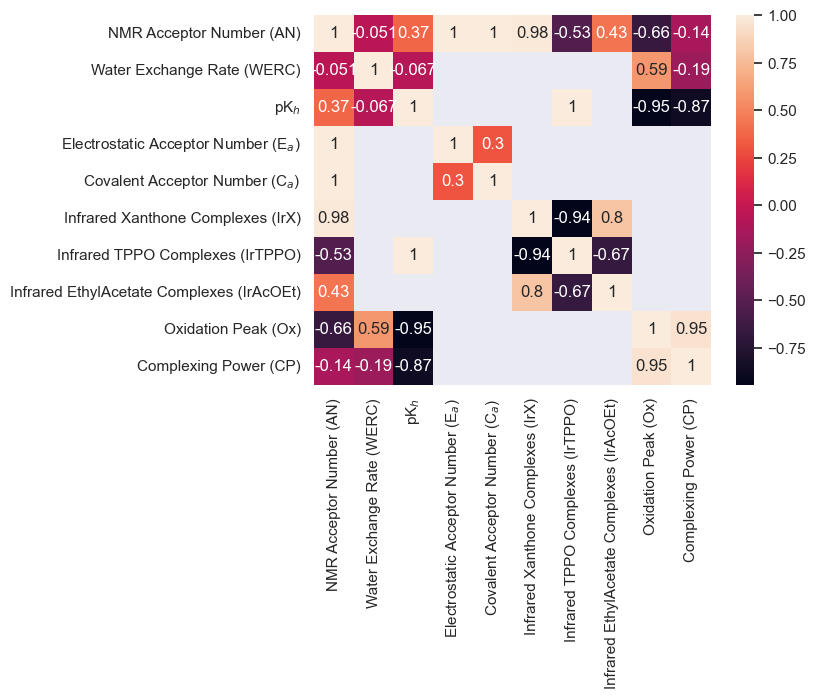

In [77]:
# visualize correlation between LA scales
sns.heatmap(df.corr(numeric_only=True), annot=True)
sns.set(font_scale=1)

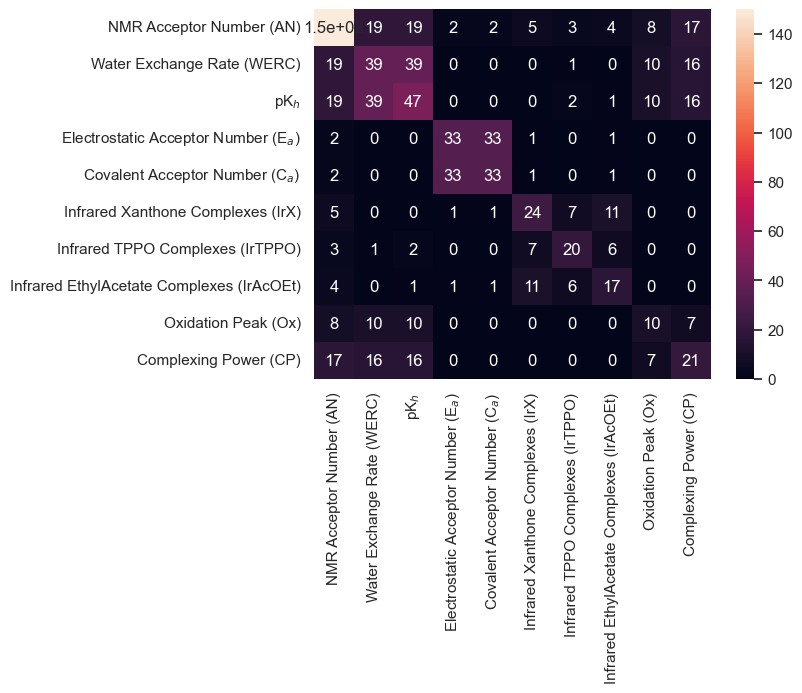

In [78]:
# visualize shared lewis acids between acidity scales: df2

# number of columns
num_rows = len(df.columns)

# building matrix of shared lewis acids between acidity scales: df2
common_val = np.zeros((num_rows - 1, num_rows - 1))

for row in df.iterrows():
    for i in range(1, num_rows):
        for j in range(1, num_rows):
            if str(row[1].values[i]*row[1].values[j]) == 'nan':
                common_val[i-1][j-1] = common_val[i-1][j-1]
            else:
                common_val[i-1][j-1] += 1
                
col = []
for i, j in enumerate(df.columns):
    col.append(j)

df2 = pd.DataFrame(list(common_val), columns = col[1:], index = col[1:])

# plotting the matrix
sns.heatmap(df2, annot=True)
sns.set(font_scale=1)

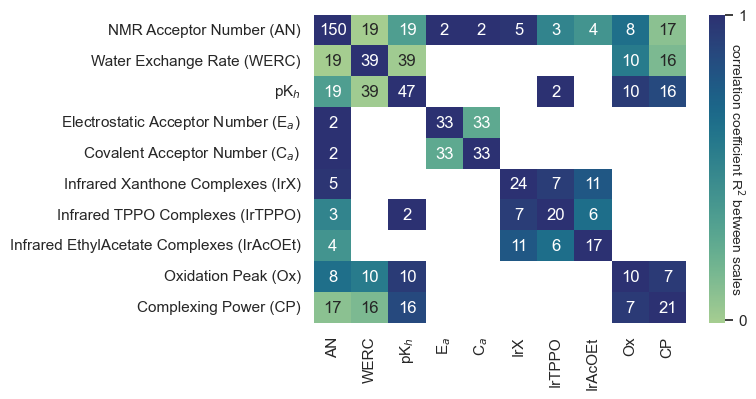

In [79]:
# plot figure 7: combination of correlation between LA scales (color) and number of shared acids 
# between LA scales (annotations)

from mpl_toolkits.axes_grid1 import make_axes_locatable
sns.set(font_scale=1)
sns.set_style("whitegrid")

df3 = df.corr(numeric_only=True)
df3 = df3.abs()
ax = plt.subplots(figsize=(6, 4))
ax = sns.heatmap(df3, annot=df2, cmap = 'crest', fmt='g')#,
               # cbar_kws={'label': 'valeur du coefficient de corrélation R$^2$ entre échelles'})

cbar = ax.collections[0].colorbar
cbar.set_label('correlation coefficient R$^2$ between scales', labelpad=0, rotation=270, fontsize=10)
cbar.set_ticks([0.06,1])
cbar.set_ticklabels([0,1])

ax.set_xticklabels(['AN','WERC','pK$_h$','E$_a$','C$_a$','IrX','IrTPPO','IrAcOEt','Ox', 'CP'])
fig = ax.get_figure()
fig.savefig("figures/subfigure_7.png", dpi=300, bbox_inches= 'tight')

In [70]:
# number of Lewis acids in the dataset:
len(df)

240

In [73]:
# number of pairs of scales that share no Lewis Acids:
n = 0
for i in X:
    for j in i:
        if j == 0:
            n+=1
int(n/2)

19


In [75]:
# number of pairs of scales that share exactly 1 Lewis Acids:
n = 0
for i in X:
    for j in i:
        if j == 1:
            n+=1
int(n/2)

6